In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings 
warnings.filterwarnings('ignore')

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute, make_forecasting_frame
from tsfresh.feature_extraction import ComprehensiveFCParameters, settings

In [2]:
df=pd.read_csv('Companies_historic_data_01-sep-2010to26-sep-2022.csv')
df.head()

,Unnamed: 0,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Priority
0,0,2010-09-01,DIVISLAB,EQ,743.95,745.00,752.00,743.30,744.65,745.00,747.50,111512.0,8.335532e+12,NaN,60290.0,0.5407,0
1,1,2010-09-02,DIVISLAB,EQ,745.00,750.00,754.50,742.10,746.00,745.05,745.72,54153.0,4.038317e+12,NaN,19161.0,0.3538,0
2,2,2010-09-03,DIVISLAB,EQ,745.05,751.00,762.70,742.00,758.10,756.70,757.44,169524.0,1.284039e+13,NaN,54191.0,0.3197,0
3,3,2010-09-06,DIVISLAB,EQ,756.70,763.75,765.85,758.00,762.55,761.65,761.27,160140.0,1.219104e+13,NaN,96032.0,0.5997,0
4,4,2010-09-07,DIVISLAB,EQ,761.65,765.00,769.90,757.35,758.00,762.20,762.23,93445.0,7.122623e+12,NaN,58227.0,0.6231,0


In [3]:
# Date filter
ts_data=df[df.Symbol=='DIVISLAB'][['Date','Symbol','Open','High','Low','Last','Close','Prev Close']]

In [4]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2995
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2996 non-null   object 
 1   Symbol      2996 non-null   object 
 2   Open        2996 non-null   float64
 3   High        2996 non-null   float64
 4   Low         2996 non-null   float64
 5   Last        2996 non-null   float64
 6   Close       2996 non-null   float64
 7   Prev Close  2996 non-null   float64
dtypes: float64(6), object(2)
memory usage: 210.7+ KB


In [5]:
ts_data.Date=pd.to_datetime(ts_data.Date)

In [6]:
ts_data.set_index('Date',drop=True,inplace=True)

In [7]:
rsi_period=7
ts_data['open_ma']=round(ts_data['Open'].rolling(rsi_period,min_periods=1).mean(),2)

In [8]:
ts_data[:15]

,Symbol,Open,High,Low,Last,Close,Prev Close,open_ma
Date,,,,,,,,
2010-09-01,DIVISLAB,745.00,752.00,743.30,744.65,745.00,743.95,745.00
2010-09-02,DIVISLAB,750.00,754.50,742.10,746.00,745.05,745.00,747.50
2010-09-03,DIVISLAB,751.00,762.70,742.00,758.10,756.70,745.05,748.67
2010-09-06,DIVISLAB,763.75,765.85,758.00,762.55,761.65,756.70,752.44
2010-09-07,DIVISLAB,765.00,769.90,757.35,758.00,762.20,761.65,754.95
2010-09-08,DIVISLAB,755.20,760.00,744.20,755.00,755.35,762.20,754.99
2010-09-09,DIVISLAB,760.10,763.90,755.05,757.15,757.05,755.35,755.72
2010-09-13,DIVISLAB,760.25,773.50,760.00,766.00,767.80,757.05,757.90
2010-09-14,DIVISLAB,770.00,776.00,746.00,751.50,750.00,767.80,760.76


<AxesSubplot:xlabel='Date'>

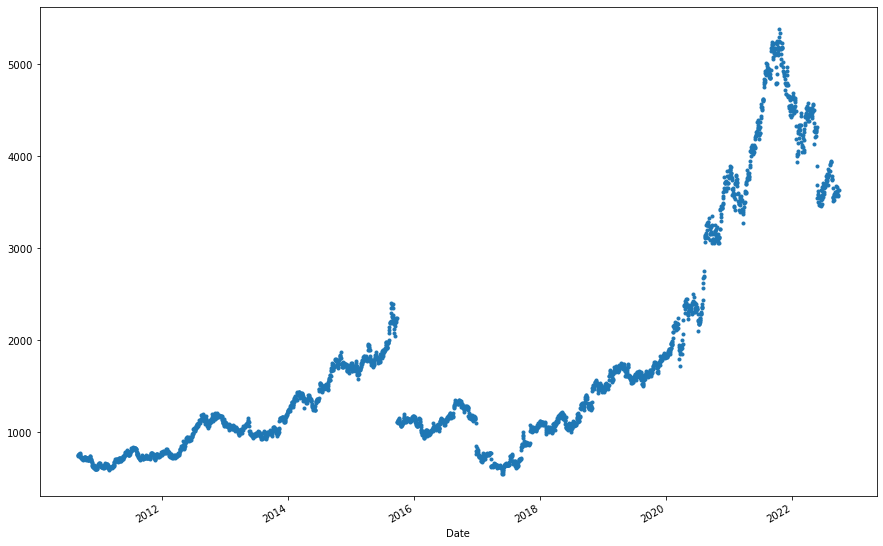

In [9]:
plt.figure(figsize=(15,10))
ts_data.Open.plot(style='.')
#ts_data['open_ma'].plot()
#ts_data.High.plot()
#ts_data.Low.plot()
#ts_data.Close.plot()

In [10]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2996 entries, 2010-09-01 to 2022-09-26
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      2996 non-null   object 
 1   Open        2996 non-null   float64
 2   High        2996 non-null   float64
 3   Low         2996 non-null   float64
 4   Last        2996 non-null   float64
 5   Close       2996 non-null   float64
 6   Prev Close  2996 non-null   float64
 7   open_ma     2996 non-null   float64
dtypes: float64(7), object(1)
memory usage: 210.7+ KB


In [155]:
train=ts_data[(ts_data.index<'08-01-2021')&(ts_data.index>'01-01-2021')][['Close']]
test=ts_data[(ts_data.index>='08-01-2021')&(ts_data.index<'08-07-2021')][['Close']]

In [156]:
train

,Close
Date,
2021-01-04,3862.25
2021-01-05,3842.10
2021-01-06,3879.85
2021-01-07,3803.05
2021-01-08,3859.15
...,...
2021-07-26,4921.15
2021-07-27,4791.40
2021-07-28,4890.60


In [157]:
test

,Close
Date,
2021-08-02,4928.95
2021-08-03,5006.85
2021-08-04,4964.25
2021-08-05,4923.55
2021-08-06,4916.00


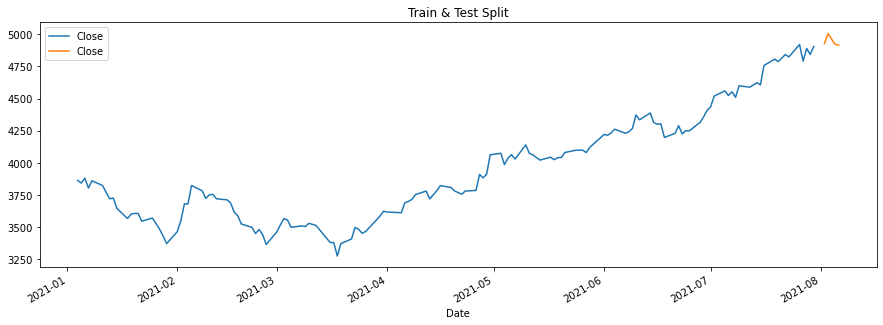

In [158]:
fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Traing data',title='Train & Test Split')
test.plot(ax=ax,label='Test data')
#ax.axvline('09-01-2020',color='black',ls='--')
ax.legend()
plt.show()

In [159]:
def date_time_features(ts_data):
    '''
    Create Features from data frame using the df index 
    '''
    ts_data=ts_data.copy()
    ts_data['day_of_week']=ts_data.index.day_of_week
    ts_data['week_of_the_year']=ts_data.index.weekofyear
    ts_data['quater']=ts_data.index.quarter
    ts_data['day_of_year']=ts_data.index.day_of_year
    ts_data['day_of_month']=ts_data.index.day
    ts_data['month']=ts_data.index.month
    return ts_data

In [160]:
train = date_time_features(train)
test =  date_time_features(test)
 

In [161]:
import xgboost as xgb

In [171]:
from sklearn.metrics import r2_score, mean_squared_error

In [163]:
xtrain=train.drop('Close',axis=1)
ytrain=train.Close

xtest=test.drop('Close',axis=1)
ytest=test.Close

In [164]:
reg_model=xgb.XGBRegressor(n_estimators=1000,
                        early_stopping_rounds=50)
reg_model.fit(xtrain,ytrain,
             eval_set=[(xtrain,ytrain),(xtest,ytest)],verbose=10)

[0]	validation_0-rmse:2801.19739	validation_1-rmse:3663.92699
[10]	validation_0-rmse:102.81646	validation_1-rmse:283.15937
[20]	validation_0-rmse:18.26280	validation_1-rmse:107.66183
[30]	validation_0-rmse:10.10013	validation_1-rmse:102.25742
[40]	validation_0-rmse:5.27485	validation_1-rmse:101.06669
[50]	validation_0-rmse:3.19044	validation_1-rmse:101.03329
[60]	validation_0-rmse:2.00525	validation_1-rmse:101.49248
[70]	validation_0-rmse:1.51340	validation_1-rmse:101.78758
[80]	validation_0-rmse:1.02357	validation_1-rmse:102.07704
[90]	validation_0-rmse:0.70476	validation_1-rmse:102.25505
[99]	validation_0-rmse:0.43354	validation_1-rmse:102.15286


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [165]:
ypred=reg_model.predict(xtest)

In [166]:
r2_score(ytest,ypred)

-7.873634670466865

In [172]:
mean_squared_error(ytest,ypred)

10137.343181703598

In [173]:
predicted_data=pd.DataFrame(ypred,index=ytest.index) 

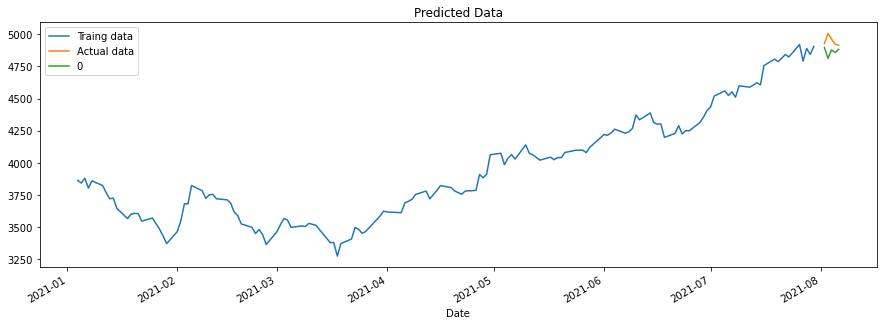

In [174]:
fig,ax=plt.subplots(figsize=(15,5))
ytrain.plot(ax=ax,label='Traing data',title='Predicted Data')
ytest.plot(ax=ax,label='Actual data')
predicted_data.plot(ax=ax,label='predicted data')
#ax.axvline('09-01-2020',color='black',ls='--')
ax.legend()
plt.show()

In [169]:
reg_model.feature_importances_

array([3.2193912e-03, 2.9113024e-01, 5.9383656e-06, 6.5194738e-01,
       5.3697076e-02, 0.0000000e+00], dtype=float32)

In [170]:
reg_model.feature_names_in_

array(['day_of_week', 'week_of_the_year', 'quater', 'day_of_year',
       'day_of_month', 'month'], dtype='<U16')